<a href="https://colab.research.google.com/github/Vsevolod245/ML-Tasks/blob/master/ML_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторная работа №7
##Методы Rejection Sampling и Metropolis Gasting

In [ ]:
import math
from numpy import linspace
from numpy.random import normal, rand
import matplotlib.pyplot as plt

Распределения

In [ ]:
# Распределение Гаусса
def Gauss(u):
  o=2
  return math.e**(-(math.pi-u)**2/(2*o**2))/(o*math.sqrt(2*math.pi))
# Распределение Вейбулла
def Weibull(t):
  a=2
  b=2
  return b/a*(t/a)**(b-1)*math.e**(-(t/a)**b)

Rejection Sampling

In [ ]:
def RS(N,f,a,b,c):
  '''
  N - количество точек 
  f - функция
  a - начало отрезка 
  b - конец отрезка 
  c - высота
  '''
  X = []
  Y = []
  False_X = []
  False_Y = []
  while len(X)<N:
    x = rand() * (b-a) + a
    y = rand() * c
    if y < f(x):
      X.append(x)
      Y.append(y)
    else:
      False_X.append(x)
      False_Y.append(y)
  return X,Y,False_X,False_Y

Metropolis Hastings

In [ ]:
def MH(N,x0,f):
  '''
  N - количество точек
  x0 - начальная точка
  f - функция
  '''
  X = [x0]
  while len(X) < N:
    x_old = X[-1]
    x_new = normal(x_old)
    a = f(x_new)/f(x_old)
    if rand() < a:
      X.append(x_new)
    else:
      X.append(x_old)
  return X

Графики

In [ ]:
# График Rejection Sampling
def RSPlot(N,f,a,b,c):
  '''
  N - количество точек 
  f - функция
  a - начало отрезка 
  b - конец отрезка 
  c - высота
  '''
  xs = linspace(a, b, N)
  ys = f(xs)
  X,Y,False_X,False_Y = RS(N,f,a,b,c)
  plt.hist(X, 50, density=True,color="green")
  plt.plot(xs, ys,color = "red")
  plt.scatter(X, Y, s=1,color = "red", marker = "*")
  plt.scatter(False_X, False_Y, s=1, color = "blue", marker = "*")
  plt.xlabel("X"), plt.ylabel("Y"), plt.xlim(a,b), plt.ylim(0, c)
  plt.show()

# График Metropolis Hastings
def MHPlot(N,x0,f,a,b,c):
  '''
  N - количество точек 
  x0 - начальная точка
  f - функция
  a - начало отрезка 
  b - конец отрезка 
  c - высота
  '''
  X = MH(N,x0,f)
  xs = linspace(a, b, 100)
  ys = f(xs)
  plt.hist(X, 50, density=True,color="green")
  plt.plot(xs, ys, color = "red")
  plt.xlabel("X"), plt.ylabel("Y"), plt.xlim(a,b), plt.ylim(0, c)
  plt.show()

Тест

___Rejection Sampling___


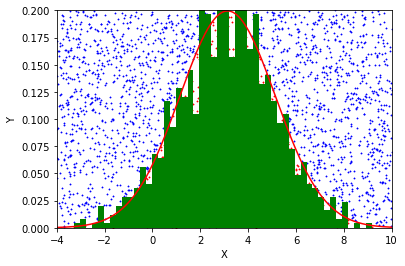

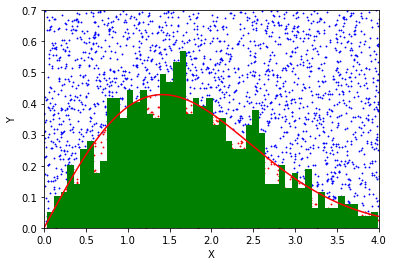

___Metropolis Hastings___


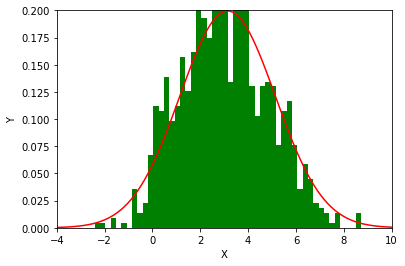

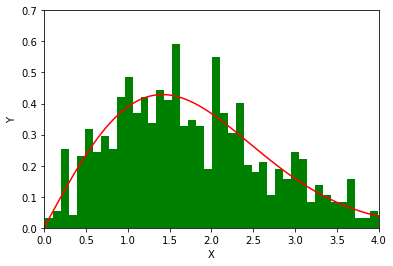

In [ ]:
print("___Rejection Sampling___")
RSPlot(1000, Gauss, -4, 10, 0.20)
RSPlot(1000, Weibull, 0, 4, 0.7)
print("___Metropolis Hastings___")
MHPlot(1000, 1, Gauss, -4, 10, 0.20)
MHPlot(1000, 1, Weibull, 0, 4, 0.7)